In [3]:
from IPython.lib.deepreload import original_import
%load_ext autoreload
%autoreload 2

import modular_ex4
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
PADDING=2
GRAYSCALE = False
STEP_SIZE = 16
BORDER_CUT = 15

garden_video = "Garden.mp4"
house_video = "House.mp4"
kessaria_video = "Kessaria.mp4"
boat_video = "boat.mp4"

# 1. Load & Compute Motion
raw_frames = modular_ex4.load_video_frames(house_video)
motion_data = modular_ex4.compute_motion(raw_frames, STEP_SIZE, BORDER_CUT)

In [5]:
# 2. Stabilize Video
stable_frames = modular_ex4.stabilize_video(raw_frames, motion_data, enable_rotation=True)
# prev runtime: 4:40 mins

In [6]:
# 3. Compute Path for motion composition: align all frames to same coordinate system
stabilized_motion = [(u, 0, 0) for u, v, theta in motion_data]
transforms = modular_ex4.compute_camera_path(stabilized_motion)

In [7]:
geo = modular_ex4.compute_canvas_geometry(transforms, raw_frames.shape[1], raw_frames.shape[2])
# prev runtime: 1:08 mins

In [8]:
# 4. Create Movie of Multi-Perspective mosaics
movie_frames = modular_ex4.dynamic_mosaic(stable_frames, transforms, geo)
# prev runtime: 0:47 mins

Creating panorama for anchor 0.20...
Creating panorama for anchor 0.27...
Creating panorama for anchor 0.33...
Creating panorama for anchor 0.40...
Creating panorama for anchor 0.47...
Creating panorama for anchor 0.53...
Creating panorama for anchor 0.60...
Creating panorama for anchor 0.67...
Creating panorama for anchor 0.73...
Creating panorama for anchor 0.80...


In [12]:
import imageio

imageio.mimsave('outputs/house_parallax_movie.mp4', movie_frames, fps=10)
print("Movie saved!")

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (3639, 720) to (3648, 720) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Movie saved!


### for debugging: render 3 panoramas with different anchors and show them

In [10]:
# 3. Render
panorama_left = modular_ex4.render_strip_panorama(stable_frames, transforms, geo, strip_anchor=0.2, strip_padding=PADDING, grayscale_out=GRAYSCALE)
print("Panorama Left Anchor 0.2 done.")
panorama_mid = modular_ex4.render_strip_panorama(stable_frames, transforms, geo, strip_anchor=0.5, strip_padding=PADDING, grayscale_out=GRAYSCALE)
print("Panorama Mid Anchor 0.5 done.")
panorama_right = modular_ex4.render_strip_panorama(stable_frames, transforms, geo, strip_anchor=0.8, strip_padding=PADDING, grayscale_out=GRAYSCALE)
print("Panorama Right Anchor 0.8 done.")
print(">>> done.")

Panorama Left Anchor 0.2 done.
Panorama Mid Anchor 0.5 done.
Panorama Right Anchor 0.8 done.
>>> done.


initializing plot...


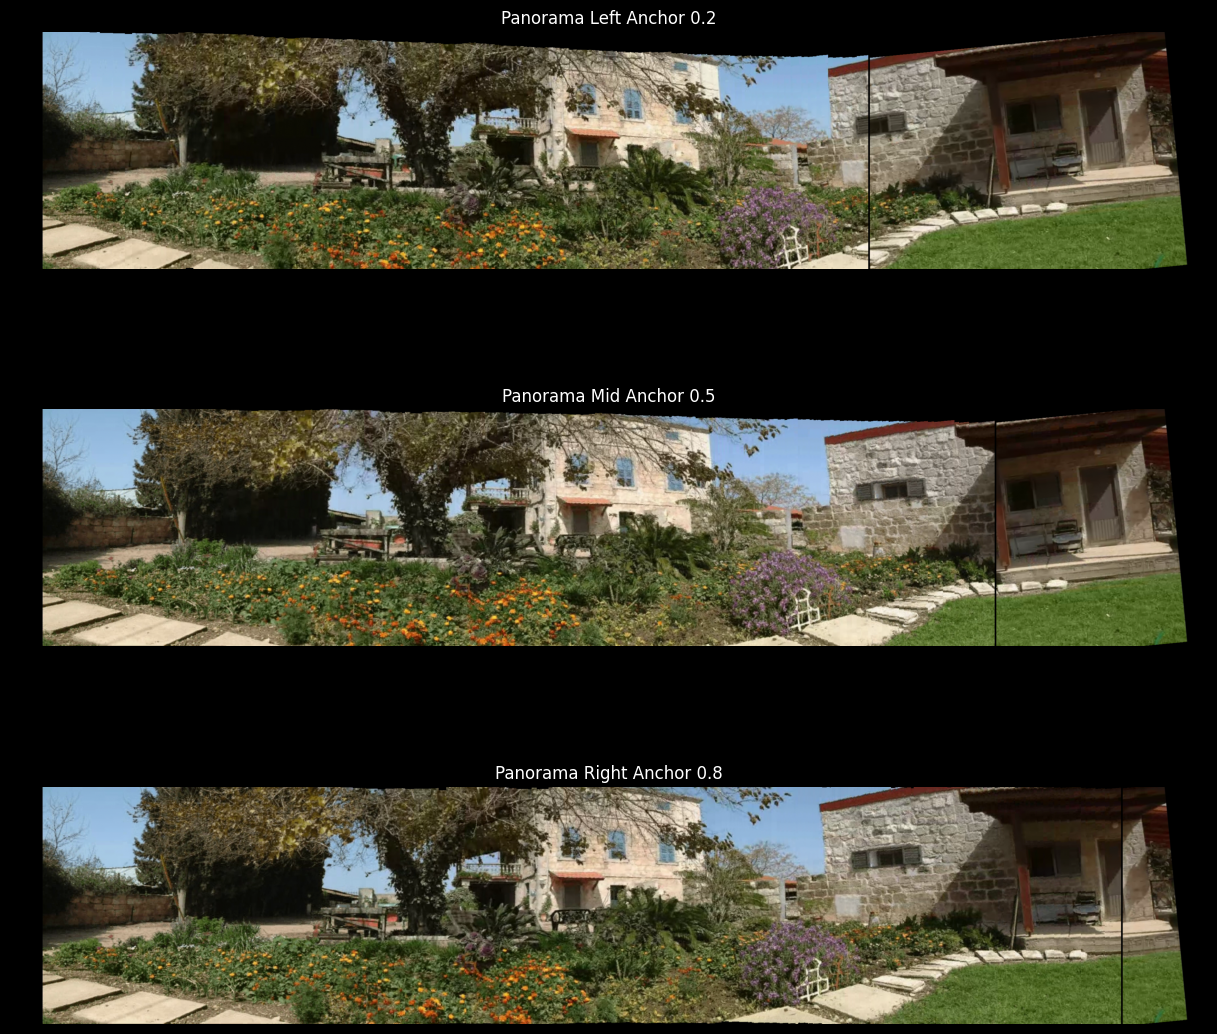

plot done.


In [11]:
# show all 3 panoramas one line below the other
# with tight layout, no vertical padding between lines
print("initializing plot...")
plt.figure(figsize=(12, 12))
plt.subplot(3, 1, 1)
plt.imshow(panorama_left)
plt.title("Panorama Left Anchor 0.2")
plt.axis('off')
plt.subplot(3, 1, 2)
plt.imshow(panorama_mid)
plt.title("Panorama Mid Anchor 0.5")
plt.axis('off')
plt.subplot(3, 1, 3)
plt.imshow(panorama_right)
plt.title("Panorama Right Anchor 0.8")
plt.axis('off')
plt.tight_layout(pad=0.1)
plt.show()
print("plot done.")